In [1]:
import pandas as pd
import csv
import re
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#spacy------------------------------
import spacy
# print('spaCy Version: %s' % (spacy.__version__))  # spaCy Version: 2.3.2
import en_core_web_sm
import en_core_web_lg
from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.symbols import PUNCT, NUM, AUX, X, CONJ, ADJ, VERB, PART, SPACE, CCONJ,INTJ,NOUN
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
nlp = spacy.load('en_core_web_lg')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords = spacy_stopwords.union({
    'easy', 'long', 'nice', 'tasty','white','dry','little','simple',
    'great', 'good','username','text','oz','sure'})

In [3]:
print('First ten stop words: %s' % list(spacy_stopwords)[:10])
print(len(spacy_stopwords))

First ten stop words: ['himself', 'my', 'keep', 'mostly', 'serious', 'latterly', 'am', 'about', 'itself', 'ca']
340


In [4]:
df = pd.read_csv(r'.\cocktail_all_08924_class_combine.csv',encoding='utf-8-sig')  #cocktail_all_combine
df['mix'] = '['+ df['ins'].map(str)+']' +df['comment'].map(str)+'\r''\r'+ df['Vodka'].map(str)+'\r'+ df['Rum'].map(str)+'\r'+ df['Gin'].map(str)+'\r'+ df['Tequila'].map(str)+'\r'+'\r'+''+ df['Whiskey'].map(str)+'\r'+'\r'+ df['Brandy'].map(str)+'\r'+ df['liqueur'].map(str)+']'
# print(df['mix'])
# df['mix'] = '['+ df['ins'].map(str)+']' +df['comment'].map(str)+'\r'+'\r'+df['favor'].map(str)+'\r''\r'+ df['Vodka'].map(str)+'\r'+ df['Rum'].map(str)+'\r'+ df['Gin'].map(str)+'\r'+ df['Tequila'].map(str)+'\r'+'\r'+''+ df['Whiskey'].map(str)+'\r'+'\r'+ df['Brandy'].map(str)+'\r'+ df['liqueur'].map(str)+']'
#
dff = df[df['mix'] != '[nan]nannannannannannannannan']
data = list(dff['mix'])
# print(data)
data_i = [i.lower().replace('nan','').strip().strip('\r').strip('\\').strip('\t') for i in data if len(i) != 0]
# print(data_i)
remove_chars = '[0-9’!"#$%&()*+-./:;<=>?@，。?★、…【】\'\r《》？“”‘’！\\\\[\\]^_`{|}~]+' #移除數字及特殊符號
remove = [re.sub(remove_chars, '' , i) for i in data_i]
text = [re.compile('').sub('', i)for i in remove]
# # text = [re.compile('').sub('', i)for i in remove if len(i) != 0] #移除空格
# print(text)
#
# # print(index)
name = list(dff['name'])
print(name[:10])

["Bobby Burns (Difford's own)", 'Garibaldi', 'The Broady', 'Hesitation ', 'Japanese Slipper', 'Manhattan (Perfect)', 'Petanque cocktail', "Archibald's Last Memory Cocktail", 'Hot Buttered Rum Cocktail', "Auntie's Hot Xmas Punch"]


In [5]:

##-----------------------------查看資訊-------------------------

for token in nlp(str(text[1:100])):
    if  token.pos_ == 'INTJ' or  token.pos_ == 'INTJ':
        print('token.text:',token.text,'token.lemma_:',token.lemma_,'token.pos_:',token.pos_,'token.tag_:',token.tag_,'token.is_stop:',token.is_stop)

#     print('token.text:',token.text,'token.lemma_:',token.lemma_,'token.pos_:',token.pos_,'token.tag_:',token.tag_,
#     'token.dep_:',token.dep_,'token.shape_:', token.shape_,'token.is_alpha:',token.is_alpha,'token.is_stop:',token.is_stop)
#     print()


token.text: ï¿½ï¿½menacingï¿½ï¿½ token.lemma_: ï¿½ï¿½menacingï¿½ï¿½ token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: yeah token.lemma_: yeah token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: unknownï¿½ï¿½ token.lemma_: unknownï¿½ï¿½ token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: lilï¿½ï¿½ token.lemma_: lilï¿½ï¿½ token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: please token.lemma_: please token.pos_: INTJ token.tag_: UH token.is_stop: True
token.text: um token.lemma_: um token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: welcome token.lemma_: welcome token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: ok token.lemma_: ok token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: oh token.lemma_: oh token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: wow token.lemma_: wow token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: please token.lemma_: please token.pos_: INT

In [6]:
# # #-----------------------用正則及CountVectorizer做詞性還原及分詞-及停用詞-------------------------------------------------
lemma_data = []
for idx, item in enumerate(text):
    doc = nlp(item)  # --> set the document vocab
    doc_spacy = Doc(doc.vocab, words=[t.text for t in doc]) #vocab：詞彙表
    token_lemma_data = [token.lemma_ for token in doc_spacy if not token.is_stop]

    # print(token_lemma_data)
    lemma_data.append(token_lemma_data)
corpus = [str(item).strip().replace('\\','').replace('\t','') for item in lemma_data if len(str(item)) > 1]
print('corpus',corpus[:5])

corpus ["['lemon', 'zest', 'twist', 'discard', ' ', 'slice', 'shortbreadwhat', 'terrific', 'cocktail', 'not', 'try', 'shortbread', 'great', 'lemon', 'twistwhiskey']", "['orange', 'wedge', 'rest', 'rimusing', 'milk', 'frother', 'aerate', 'orange', 'juice', 'purchase', 'similar', 'breville', 'juicer', 'voila', 'danteperfect', 'garibaldi', 'home', 'juice', 'piller', 'elbow', 'not', 'throw', 'juice', 'achieve', 'fluffinessliqueur']", "['agave', 'influence', 'riff', 'blood', ' ', 'sand', 'cherry', 'orange', 'lace', 'tequila', 'smoky', 'hint', 'mezcali', 'know', 'exactly', 'mr', 'broad', 'mean', 'think', 'come', 'mind', 'ï¿½ï¿½menacingï¿½ï¿½', 'think', 'itï¿½ï¿½s', 'mezcal', 'underlie', 'delicious', 'menacingliqueur']", "['lightly', 'spice', 'slightly', 'sweet', 'sidenice', 'sweet', 'sour', 'balance', 'sugar', 'syrupwhiskeyliqueur']", "['sweet', 'melon', 'orange', 'liqueur', 'lemon', 'bite', 'sweetie', 'lurid', 'green', 'colour', 'suggestinterested', 'tequila', 'like', ' ', 'will', 'like', '

In [7]:
# # # -----------------詞性還原 及 詞性標註(只留形容詞、感嘆詞、名詞)---------------------------------------
# # #
pos_data =[]
for n, item in enumerate(text):
    doc = nlp(item)
    # pos = [token.pos_ for token in doc]
    # doc_spacy = Doc(doc.vocab, words=[t.text for t in doc])
    no_VERB = [token.lemma_ for token in doc if token.pos_ == 'ADJ' ] #or token.pos_ == 'NOUN'or token.pos_ == 'PROPN'
    pos_data.append(no_VERB)
# print('pos_data',pos_data)
pos = [str(item).strip().replace('\\','').replace('\t','') for item in pos_data if len(str(item)) > 1]
print('pos',pos[:10])

pos ["['shortbreadwhat', 'terrific', 'great']", "['orange', 'same', 'similar']", "['smoky', 'first', 'delicious']", "['sweet', 'sweet', 'sour']", "['lurid', 'green', 'japanese', 'previous']", "['favorite']", "['french', 'main', 'spanish', 'italian', 'basque', 'tired']", "['spirituous', 'least', 'last', 'proper', 'herbal', 'honest', 'spirituous', 'more', 'delicate', 'herbal', 'delicious', 'real']", '[]', "['rich', 'hot', 'nice', 'cold', 'rainy', 'salutary', 'sure']"]


In [8]:
# # # ---------------------------------------------------------------
# # # # # 計算單字次數：
vect = CountVectorizer(token_pattern='(?u)\\b\\w\\w+\\b',stop_words=spacy_stopwords,min_df=0.008)#,max_df=0.99,min_df=0.01)
x_train = vect.fit_transform(pos)
feature = vect.get_feature_names()
print(feature)

['balanced', 'bitter', 'bittersweet', 'classic', 'delicious', 'different', 'fresh', 'fruity', 'herbal', 'interesting', 'light', 'old', 'orange', 'original', 'refreshing', 'rich', 'sour', 'strong', 'subtle', 'sweet']


c:\users\big data\anaconda3\envs\heart\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [9]:
# # # # # #------------dataframe貯存---------------------
count_feature = pd.DataFrame(x_train.toarray(), columns=feature, index=name)
print('dataframe:',count_feature)
count_feature.to_csv(r'./mix_pos_feature_matrix_0824.csv', encoding='utf-8-sig')
# # # # # ---------------------------------------------------------------

dataframe:                                balanced  bitter  bittersweet  classic  \
Bobby Burns (Difford's own)           0       0            0        0   
Garibaldi                             0       0            0        0   
The Broady                            0       0            0        0   
Hesitation                            0       0            0        0   
Japanese Slipper                      0       0            0        0   
...                                 ...     ...          ...      ...   
Yesterday, Today and Amaro            0       0            0        0   
Youngstown Tube                       0       0            0        0   
You Have A Drink Named Steve?         0       0            0        0   
Your Second Cousin                    0       0            0        0   
You Only Live Twice                   0       1            0        0   

                               delicious  different  fresh  fruity  herbal  \
Bobby Burns (Difford's own)       

In [10]:
# # # #計算tfidf權重--------------------------------------
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(x_train)
weight = tfidf_matrix.toarray()
# # # #------------dataframe貯存---------------------
tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=feature,index=name)
print('tfidf_matrix:',tfidf)

tfidf.to_csv(r'./tfidfmatrix.csv', encoding='utf-8-sig')

tfidf_matrix:                                balanced    bitter  bittersweet  classic  \
Bobby Burns (Difford's own)         0.0  0.000000          0.0      0.0   
Garibaldi                           0.0  0.000000          0.0      0.0   
The Broady                          0.0  0.000000          0.0      0.0   
Hesitation                          0.0  0.000000          0.0      0.0   
Japanese Slipper                    0.0  0.000000          0.0      0.0   
...                                 ...       ...          ...      ...   
Yesterday, Today and Amaro          0.0  0.000000          0.0      0.0   
Youngstown Tube                     0.0  0.000000          0.0      0.0   
You Have A Drink Named Steve?       0.0  0.000000          0.0      0.0   
Your Second Cousin                  0.0  0.000000          0.0      0.0   
You Only Live Twice                 0.0  0.558254          0.0      0.0   

                               delicious  different  fresh  fruity  herbal  \
Bobby B

In [11]:
# 数据标准化-------------------------------------------------
from sklearn import preprocessing

'''
preprocessing.scale()是按照列进行标准化计算，计算公式为:
(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
(X_train[:,0]-np.mean(X_train[:,0]))/np.std(X_train[:,0])//或者
'''
X_scaled = preprocessing.scale(weight)  # scale操作之后的数据零均值，单位方差（方差为1）
print(X_scaled)

[[-0.08664193 -0.11511726 -0.08810518 ... -0.08998773 -0.0879243
  -0.20574279]
 [-0.08664193 -0.11511726 -0.08810518 ... -0.08998773 -0.0879243
  -0.20574279]
 [-0.08664193 -0.11511726 -0.08810518 ... -0.08998773 -0.0879243
  -0.20574279]
 ...
 [-0.08664193 -0.11511726 -0.08810518 ... -0.08998773 -0.0879243
  -0.20574279]
 [-0.08664193 -0.11511726 -0.08810518 ... -0.08998773 -0.0879243
  -0.20574279]
 [-0.08664193  6.05855498 -0.08810518 ... -0.08998773 -0.0879243
  -0.20574279]]


In [12]:
# # # # #-------------------------------------------------------------------------------------------------------
# # 进行PCA数据降维
from sklearn.decomposition import PCA
#
# # 生成PCA实例
pca = PCA(n_components=3)  # 把维度降至3维
# # 进行PCA降维
X_pca = pca.fit_transform(X_scaled)
print(X_pca)
# # 生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3'])  # 原始数据由(30000, 7)降维至(30000, 3)
print(X_pca_frame)

[[-0.45529577 -0.08921958 -0.02495725]
 [ 3.08432053 -1.74371678  3.9935405 ]
 [ 2.09189578 -1.23302459  3.6181683 ]
 ...
 [-0.45529577 -0.08921958 -0.02495725]
 [-0.45529577 -0.08921958 -0.02495725]
 [ 3.91617357 -2.35646918 -2.02155807]]
          pca_1     pca_2     pca_3
0     -0.455296 -0.089220 -0.024957
1      3.084321 -1.743717  3.993541
2      2.091896 -1.233025  3.618168
3      3.036441  0.209366 -1.932182
4     -0.455296 -0.089220 -0.024957
...         ...       ...       ...
22481  2.143277 -1.998604 -1.193700
22482 -0.455296 -0.089220 -0.024957
22483 -0.455296 -0.089220 -0.024957
22484 -0.455296 -0.089220 -0.024957
22485  3.916174 -2.356469 -2.021558

[22486 rows x 3 columns]


In [13]:
# # # # # #--------------------kmeans--------------------------------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# # #
from sklearn.manifold import TSNE
# # 指定分成5个类
clf = KMeans(n_clusters=7)
kmean = clf.fit(X_pca)#開始訓練！
print(kmean.cluster_centers_)
# # 打印出各个族的中心点
# for index ,label in enumerate(kmean.labels_,1):
#     print('index:{},label:{}'.format(index,label))
# # 样本距其最近的聚类中心的平方距离之和，用来评判分类的准确度，值越小越好
# # k-means的超参数n_clusters可以通过该值来评估
print("inertia: {}".format(kmean.inertia_))

[[ 3.92845955 -2.10157026 -0.7050167 ]
 [-0.44964412 -0.10639637 -0.02314277]
 [ 1.52667175  3.95594441  4.30803119]
 [ 2.48880832  4.64905369 -3.35396279]
 [ 2.5256374  -0.94842164  3.04344265]
 [ 2.00230381 -0.28818544 -1.44144809]
 [ 1.01689413  2.43999269 -0.32422439]]
inertia: 11624.112913921237


Org data dimension is 20.Embedded data dimension is 2


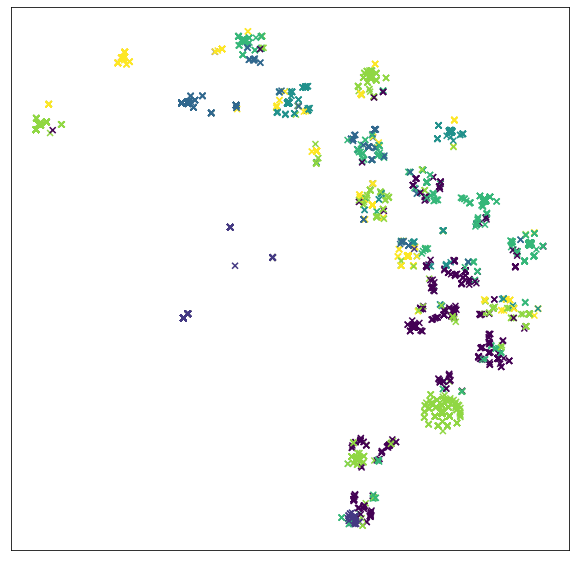

In [14]:
# # # 使用T-SNE算法，对权重进行降维，准确度比PCA算法高，但是耗时长
tsne = TSNE(n_components=2,init='pca', random_state=501) #嵌入空间的维度
decomposition_data = tsne.fit_transform(weight)
print("Org data dimension is {}.Embedded data dimension is {}".format(weight.shape[-1], decomposition_data.shape[-1]))
#
x = []
y = []
# #
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
#
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmean.labels_, marker="x")
plt.xticks(())
plt.yticks(())
plt.show()


In [15]:
# ####--------------------LDA 狄利克雷分布 找出潛在主題-------------------------------------
from sklearn.decomposition import LatentDirichletAllocation
vect_lda= CountVectorizer(stop_words=spacy_stopwords,max_df=0.15)
x = vect_lda.fit_transform(pos)
# print(x)
n_components = 11
lda = LatentDirichletAllocation(n_components=n_components,learning_method="batch",max_iter=50,random_state=0)
document_topics = lda.fit_transform(x)
shape = lda.components_.shape


# 打印每个主题下权重较高的term
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print( "Topic #%d:" % topic_idx)
        print( " ".join([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
        #打印主题-词语分布矩阵
        # print(model.components_)

n_top_words=10
tf_feature_names = vect_lda.get_feature_names()
# print(tf_feature_names )
top_word = print_top_words(lda, tf_feature_names, n_top_words)
# print(top_word)

c:\users\big data\anaconda3\envs\heart\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0:
herbal green red delicate pink tart light faint bittersweet subtle

Topic #1:
orange rich triple smoky zesty second dark boozy single subtle

Topic #2:
sweet bitter sour excellent aged original different equal high spicy

Topic #3:
old original unusual french real ½ï close wrong ½s new

Topic #4:
interesting hot black creamy subtle cold small yellow right distinctive

Topic #5:
fresh bad tangy favorite popular homemade regular ill quick wet

Topic #6:
bittersweet floral similar kindred big spicy flavoursome short favourite early

Topic #7:
delicious complex fantastic reminiscent italian hazardous interesting awesome light spanish

Topic #8:
fruity balanced new honeyed golden large true lovely warm creamy

Topic #9:
classic refreshing light smooth blue tropical wonderful equal perfect tall

Topic #10:
different strong aromatic fine extra perfect alcoholic original amazing irish

